# Matematyczny opis modelu

## Równanie opisujące rozchodzenie się temperatury

Aby opisać równanie temperatury potrzebujemy układu równań, który zależy od czasu i przestrzeni. Do modelowania użyjemy zatem modelu reakcji-dyfuzji:
$$u_t(x,t) = D \Delta u(x,t) + f(x,t,u),$$

$D = 2*10^{-5}$?
$$\left[\frac{^\circ K}{s}\right] = \left[\frac{m^2}{s}\right]\left[\frac{^\circ K}{m^2}\right] + \left[\frac{^\circ K}{s}\right]$$
gdzie $x\in\Omega$ oraz $t\in (0, T]$. Poprzez $f$ oznaczyliśmy siłę zewnętrzną. Zakładamy, że wynosi ona 1K * poziom grzejnika/1h

## Warunki brzegowe

Coś tu powiedzieć co i jak. Po co sa warunki brzegowe. I że będziemy stosować inne warunku dla okien, drzwi i ścian. 

### Okna
Kryterium Dirichleta 

$$u(x,t) = g(t),$$
gdzie $g(t)$ to temperatura na zewnątrz w chwili $t$. 

### Drzwi

Kryterium Neumanna
u(x,t) to średnia po danych drzwiach. 


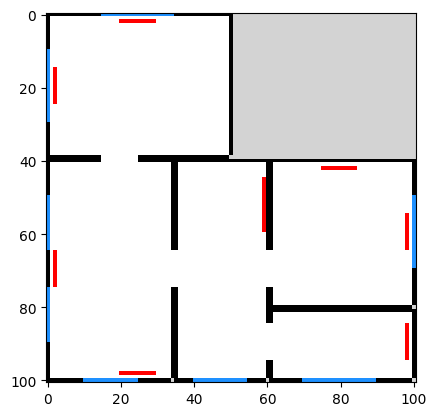

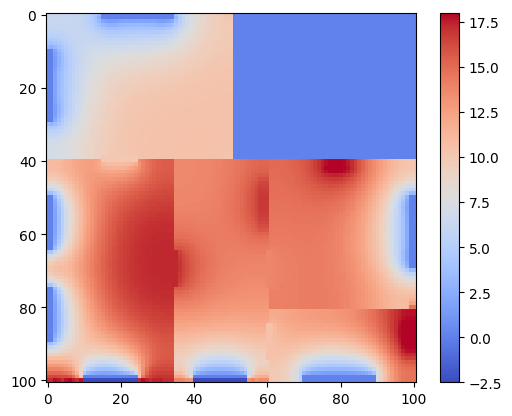

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
from house import House
from room import Room
from window import Window
from heater import Heater
from door import Door


rooms = {"I": Room(0, 50, 0, 39, (lambda x: 283 + np.random.random(x.shape))), "II": Room(0, 34, 40, 100,(lambda x: 290 + np.random.random(x.shape))),
            "III": Room(35, 60, 40, 100,(lambda x: 286 + np.random.random(x.shape))),"IV": Room(61, 100, 40, 80,(lambda x: 287 + np.random.random(x.shape))),
            "V": Room(61, 100, 81, 100,(lambda x: 288 + np.random.random(x.shape)))}
windows = [Window(False, 75, 15, 0, "II"), Window(False, 50, 15, 0,"II"), Window(False, 10, 20, 0,"I"), 
            Window(True, 10, 15, 100,"II"), Window(True, 40, 15, 100,"III"), Window(True, 70, 20, 100,"V"),
            Window(False, 50, 20, 100,"IV"), Window(True, 15, 20, 0,"I")]
heaters = [Heater(False, 65, 10, 2,"II",5), Heater(False, 15, 10, 2, "I",5), Heater(False, 45, 15, 58,"III",5,exterior=False),
            Heater(False, 55, 10, 98, "IV",5), Heater(False, 85, 10, 98, "V",5), Heater(True, 20, 10, 98, "II",5), Heater(True, 75, 10, 42, "IV",5), Heater(True, 20, 10, 2, "I",5)]
doors = [Door(True, 15, 10, 39,"I"),Door(True, 15, 10, 40,"II"), Door(False, 65, 10, 34,"II"),Door(False, 65, 10, 35,"III"), Door(False, 65, 10, 60,"III"),Door(False, 65, 10, 61,"IV"), 
            Door(False, 85,10,60,"III"),Door(False, 85,10,61,"V")]
# [left, right, top, bottom] - is interior? T/F
walls = {"I": [False, False, False, True], "II": [False, True, True, False], "III": [True, True, True, False], "IV":[True, False, False, True], "V": [True, False, True, False]} 
params = {"rooms": rooms, "windows": windows,"heaters": heaters, "doors": doors, "walls": walls, "domain": {"grid":np.meshgrid(np.linspace(-1,1,101), np.linspace(-1,1,101))[0]}}
home = House(params)
home.show()
#home.build_partial_matrices()
x = home.solution(0.1)
def update(frame_number):
    heatmap.set_data(x[frame_number])
    return [heatmap]


fig, ax = plt.subplots()
heatmap = ax.imshow(x[0], cmap='coolwarm', interpolation='nearest')
frames_to_include = range(0, len(x), 20)

colorbar = fig.colorbar(heatmap)

ani = animation.FuncAnimation(fig, update, frames=frames_to_include, blit=True)

#ani.save('heatmap_animation.mp4', writer='ffmpeg', fps=30)
HTML(ani.to_jshtml())

In [2]:
for i in range(0, 10, 2):
    print(i)

0
2
4
6
8
